<img src='logo.png' style='display: block;height: 61px;float: left;padding: .75rem 1.25rem;'>

# Desafío - Análisis lineal discriminante
* Para realizar este desafío debes haber revisado la lectura y videos correspondiente a la unidad.
* Crea una carpeta de trabajo y guarda todos los archivos correspondientes (notebook y csv).
* Una vez terminado el desafío, comprime la carpeta y sube el `.zip` a la seccióncorrespondiente.

## Descripción

Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se
registran las siguientes observaciones:

* `default` : Variable Binaria. Registra si el cliente entró en morosidad o no.
* `income` : Ingreso promedio declarado por el cliente.
* `balance` : total del sando en la cuenta de crédito.
* `student` : Variable binaria. Registra si el cliente es estudiante o no.

## Ejercicio 1: Preparación de ambiente de trabajo

* Importe los módulos básicos para el análisis de datos.
* Importe las clases `LabelEncoder` , `StandardScaler` y `LabelBinarizer` de `preprocessing`
* Importe las funciones `train_test_split` y `cross_val_score` de `model_selection`
* Importe la función `classification_report` de `metrics`
* Importe las clases `LinearDiscriminantAnalysis`` y QuadraticDiscriminantAnalysis` .
* Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

> Se utilizan librerías bases para el tratamiento de datos y algunos aspectos básicos de cálculo y gráficos.

In [1]:
# Se importa libreria para el manejo de bases de datos
import pandas as pd
# Se importa libreria para el manejo de operaciones de cálculo
import numpy as np
# Se importa libreria para el manejo de gráficos
import matplotlib.pyplot as plt
# Se importa libreria para manejo de funciones estadisticas y probabilidades
import seaborn as sns
# Librería para visualizar patrones de datos perdidos
import missingno as msngo
# Se importa libreria para el menejo de warning
import warnings

> Definimos algunos aspectos de ambiente y valores por defecto.

In [2]:
# Por defecto, matplotlib crea una figura en una ventana separada.
# podemos hacer que las figuras aparezcan en línea dentro del notebook; lo hacemos ejecutando:
%matplotlib inline
# Se ignoran los warning para evitar suciedad en la ejecución
warnings.filterwarnings(action='ignore')
# Se define el estilo de gráficos a usar
plt.style.use('seaborn-pastel')
# Se define el tamaño de los paños de los gráficos por defecto
plt.rcParams['figure.figsize'] = (10, 6)
# Dado que vamos a supervisar datos no limitaremos la cantidad de columnas a mostrar en el despliegue del dataframe
pd.options.display.max_columns = None

> Se utiliza <strong>librería propia</strong> que continen funciones auxiliares, necesarias para el desarrollo de desafíos.

In [3]:
# Se importa libreria con funciones auxiliares
import ancilliary_funcs as afx

> Se utilizan librerías <strong>sklearn</strong> para el tratamiento de escala de valores de los atributos y seleccion de set de datos:

In [4]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, StandardScaler
# Método para la selección de datos entre entrenamiento y test
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [5]:
# Se carga la base de datos y se elimina la columna index que no agrega valor.
df = pd.read_csv('default_credit.csv').drop(columns='index')

In [6]:
# Inspeccionamos los datos
df.sample(5)

,default,student,balance,income
5233,No,Yes,438.574771,17439.114954
61,No,No,690.127246,63432.984254
1225,No,No,737.685241,51138.265456
9864,No,No,1133.945796,47188.947784
9041,No,No,861.363860,47969.677264


In [7]:
# Revisamos las dimensiones de la base de datos
df.shape

(10000, 4)

In [8]:
print(len(df[df['default']==0]), len(df[df['default']==1]))

0 0


> La base de datos se compone de 10.000 observaciones con 3 atributos y el vector de clases [default]. Podemos observar que hay un desbalanceo de muestras ya que vemos que hay 9667 datos etiquetados con la __clase__ 0 y 333 con la __clase 1.__

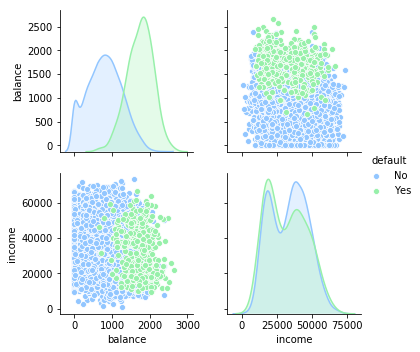

In [9]:
# Se revisa la distribución de los atributos respecto a las clases.
sns.pairplot(df, hue='default')

## Ejercicio 2: Modelo base

* Recuerde que los modelos de `sklearn` no soportan datos que no sean numéricos. Transforme los atributos pertinentes con `LabelEncoder` .
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con `LinearDiscriminantAnalysis` sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando `classification_report` .
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

> Recodificamos las columnas categóricas en numéricas con LabelEncoder()

In [10]:
df['default'] = LabelEncoder().fit_transform(df['default'])
df['student'] = LabelEncoder().fit_transform(df['student'])

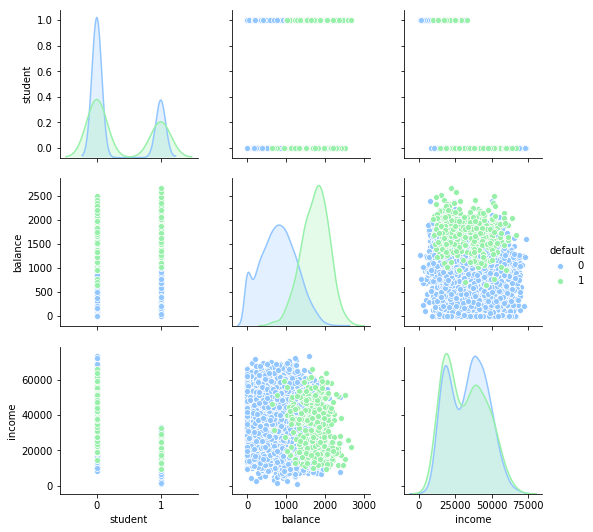

In [11]:
# Volvemos a revisar la distribución de los datos incorporando el atributo student
sns.pairplot(df, hue='default', vars=['student', 'balance', 'income'])

>Se observa que los atributos student e income tienen distribuciones acopladas tanto para la clase 0, como la clase 1, en cambio el atributo balance se visualiza con valores mas separados entre la clase 0 y clase 1.

___
> Se seleccionan datos para el entrenamiento y la validación

In [12]:
X = df.drop(columns='default')
y = df['default']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, random_state = 14173)

> Se genera un modelo LinearDiscriminantAnalysis sin modificar los hiperparámetros

In [13]:
model_lda = LinearDiscriminantAnalysis().fit(X_train, y_train)

In [14]:
yhat = model_lda.predict(X_test)

In [15]:
# Se reporta la probabilidad a priori. las medias de los atributos y la varianza explicada por cada discriminante
print("Probabilidades a priori\n", model_lda.priors_, "\n")
print("Medias de atributos en cada clase\n",model_lda.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",model_lda.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.96671642 0.03328358] 

Medias de atributos en cada clase
 [[2.900000e-01 8.012200e+02 3.354225e+04]
 [4.100000e-01 1.758960e+03 3.120141e+04]] 

Varianza explicada por cada discriminante
 [1.] 



>Las probabilidades a priori obtenidas del modelo son 0.97 y 0.33, lo que es equivalente a como se distribuyen las clases en proporción de la muestra.

In [16]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3190
           1       0.74      0.21      0.33       110

    accuracy                           0.97      3300
   macro avg       0.86      0.60      0.66      3300
weighted avg       0.97      0.97      0.96      3300



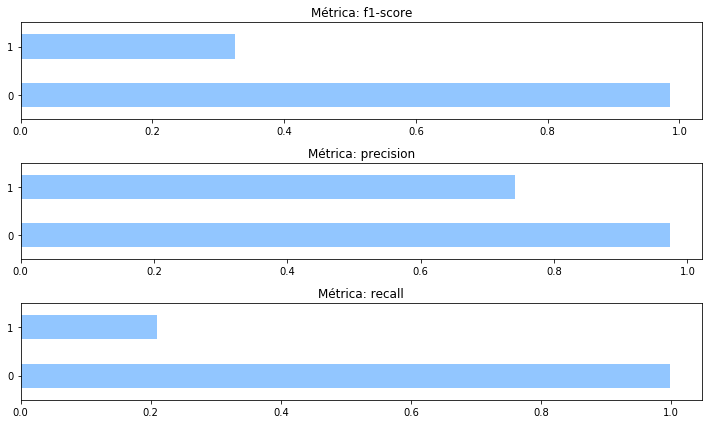

In [17]:
afx.plot_class_report(y_test, yhat, [0,1])

> __Comentario__: las metricas para la clase 0 (no moroso) son bastante buenas no obstante la clase 1 (moroso) tiene un resultado bastante débil, por lo que el modelo falla en predecir correctamente la clase 1. Este problema con la clase 1 se puede corregir modificando la probabilidad a priori o aumentando la muestra con datos etiquetados con la clase 1.

## Ejercicio 3: Refactorización 1 - información a priori

* Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
    * Asumamos que hay un 50/50 de morosos y no morosos.
    * Asumamos que hay un 60/40 de morosos y no morosos.
* Por cada modelo, reporte las métricas de clasificación.

___
> Modelo refactorizado con clases __a priori con 50 / 50 morosos y no morosos__

In [18]:
model_lda_50_50 = LinearDiscriminantAnalysis(priors=(.5,.5)).fit(X_train, y_train)

In [19]:
yhat_50_50 = model_lda_50_50.predict(X_test)

In [20]:
print(classification_report(y_test, yhat_50_50))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3190
           1       0.16      0.91      0.27       110

    accuracy                           0.84      3300
   macro avg       0.58      0.87      0.59      3300
weighted avg       0.97      0.84      0.89      3300



In [21]:
# Se reporta la probabilidad a priori. las medias de los atributos y la varianza explicada por cada discriminante
print("Probabilidades a priori\n", model_lda_50_50.priors_, "\n")
print("Medias de atributos en cada clase\n",model_lda_50_50.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",model_lda_50_50.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[2.900000e-01 8.012200e+02 3.354225e+04]
 [4.100000e-01 1.758960e+03 3.120141e+04]] 

Varianza explicada por cada discriminante
 [1.] 



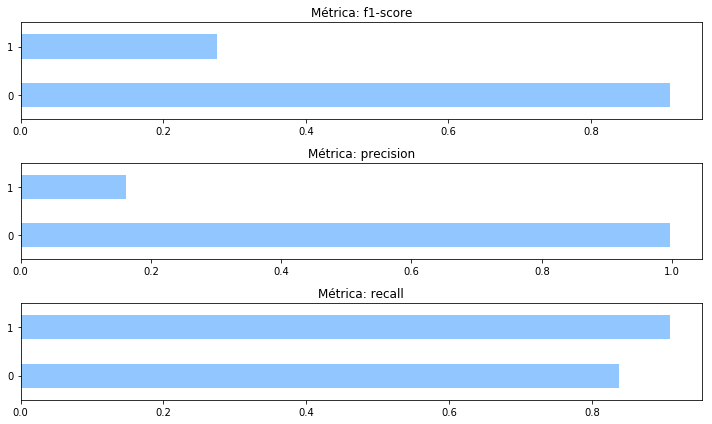

In [22]:
afx.plot_class_report(y_test, yhat_50_50, [0,1])

>Se observa que el modelo no mejoró en predecir la clase 1, bajando en la métrica F1 y la presición de la clase 1 de 0.33 a 0.27. Por otro lado, el modelo mejoró la preción de la clase 0, pero empeoró recall de la clase 0.
>
>Veamos que sucede al modificar la probabilidad a priori con 60% para la clase 1 y reduciendo a 40% la probabilidad de la clase 0.

___
> Modelo refactorizado con clases a priori con __60 / 40 morosos y no morosos__

In [23]:
model_lda_60_40 = LinearDiscriminantAnalysis(priors=(.4,.6)).fit(X_train, y_train)

In [24]:
yhat_60_40 = model_lda_60_40.predict(X_test)

In [25]:
# Se reporta la probabilidad a priori. las medias de los atributos y la varianza explicada por cada discriminante
print("Probabilidades a priori\n", model_lda_60_40.priors_, "\n")
print("Medias de atributos en cada clase\n",model_lda_60_40.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",model_lda_60_40.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.4 0.6] 

Medias de atributos en cada clase
 [[2.900000e-01 8.012200e+02 3.354225e+04]
 [4.100000e-01 1.758960e+03 3.120141e+04]] 

Varianza explicada por cada discriminante
 [1.] 



In [26]:
print(classification_report(y_test, yhat_60_40))

              precision    recall  f1-score   support

           0       1.00      0.79      0.88      3190
           1       0.13      0.95      0.23       110

    accuracy                           0.79      3300
   macro avg       0.57      0.87      0.56      3300
weighted avg       0.97      0.79      0.86      3300



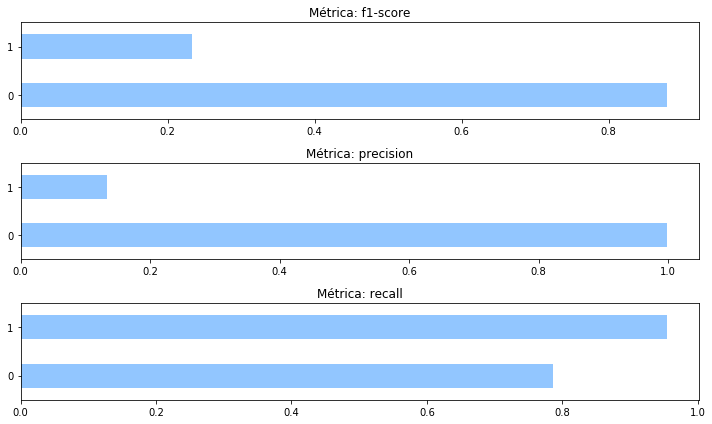

In [27]:
afx.plot_class_report(y_test, yhat_60_40, [0,1])

> Se observa una leve baja en F1 y recall de la clase 0. Por otro lado, para la clase 1 se observa una leve mejora en recall, pero una baja en F1 y precisión. Hasta el momento no hemos mejorado el modelo sustancialmente.
>
>Veremos otro método para balancear las clases de la muestra.

## Ejercicio 4: Refactorización 2 - oversampling

* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases.
Ahora generaremos observaciones sintéticas mediante **SMOTE** (Synthetic Minority
Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En
nuestro terminal agregamos `conda install -c conda-forge imbalanced-learn` . Incorpore
SMOTE en el ambiente de trabajo con la siguiente sintáxis `from imblearn.over_sampling import SMOTE` .
* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra
muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente
sintáxis:


> ~~~~python
> from imblearn.over_sampling import SMOTE
> # Instanciamos la clase
> oversampler = SMOTE(random_state=11238, ratio='minority')
> # generamos el eversampling de la matriz de entrenamiento y
> X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)
~~~~

* Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su
desempeño.

In [28]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state=14173, ratio='minority')
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

In [29]:
model_lda_os = LinearDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

In [30]:
yhat_os = model_lda_os.predict(X_test)

In [31]:
# Se reporta la probabilidad a priori. las medias de los atributos y la varianza explicada por cada discriminante
print("Probabilidades a priori\n", model_lda_os.priors_, "\n")
print("Medias de atributos en cada clase\n",model_lda_os.means_.round(2), "\n")
print("Varianza explicada por cada discriminante\n",model_lda_os.explained_variance_ratio_.round(2), "\n")

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[2.900000e-01 8.012200e+02 3.354225e+04]
 [4.100000e-01 1.766690e+03 3.119165e+04]] 

Varianza explicada por cada discriminante
 [1.] 



In [32]:
print(classification_report(y_test, yhat_os))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91      3190
           1       0.16      0.92      0.28       110

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.60      3300
weighted avg       0.97      0.84      0.89      3300



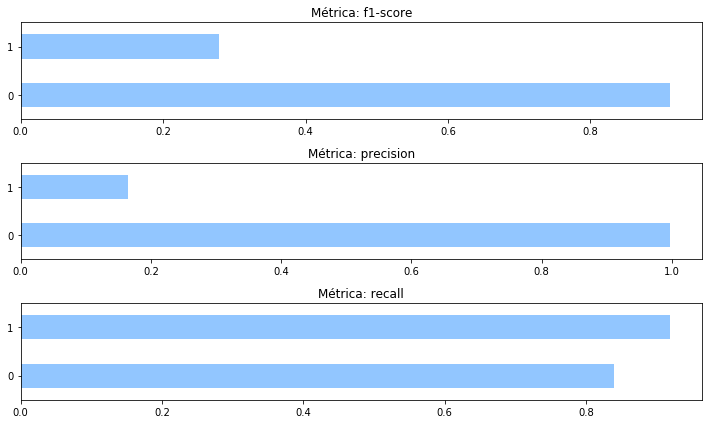

In [33]:
afx.plot_class_report(y_test, yhat_os, [0,1])

> Hemos mejorado levemente el desempeño de precision y F1 del modelo en predecir la clase 1, no obstante recall se redujo un poco.
>
>Para el caso de la clase 0 se mejoró levemente recall y F1.
>
>El modelo sigue presentando el problemas de rebalanceo y es probabla que necesitemos tomar más muestras.

## Ejercicio 5: Refactorización 3 - QDA

* Por último, implemente un modelo `QuadraticDiscriminantAnalysis` con los datos
aumentados artificialmente. Genere las métricas de desempeño.
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

In [34]:
model_qda = QuadraticDiscriminantAnalysis().fit(X_train_oversamp, y_train_oversamp)

In [35]:
yhat_qda = model_qda.predict(X_test)

In [36]:
# Se reporta la probabilidad a priori. las medias de los atributos y la varianza explicada por cada discriminante
print("Probabilidades a priori\n", model_qda.priors_, "\n")
print("Medias de atributos en cada clase\n",model_qda.means_.round(2), "\n")

Probabilidades a priori
 [0.5 0.5] 

Medias de atributos en cada clase
 [[2.900000e-01 8.012200e+02 3.354225e+04]
 [4.100000e-01 1.766690e+03 3.119165e+04]] 



In [37]:
print(classification_report(y_test, yhat_qda))

              precision    recall  f1-score   support

           0       1.00      0.86      0.93      3190
           1       0.19      0.90      0.31       110

    accuracy                           0.87      3300
   macro avg       0.59      0.88      0.62      3300
weighted avg       0.97      0.87      0.91      3300



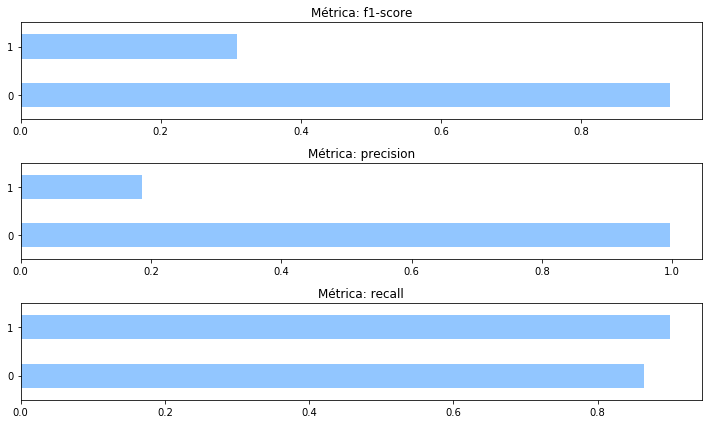

In [38]:
afx.plot_class_report(y_test, yhat_qda, [0,1])

> Hemos mejorado levemente el desempeño de precision y F1 del modelo en predecir la clase 1, no obstante recall se redujo un poco.
>
>Para el caso de la clase 0 se mejoró levemente recall y F1.
>
>El modelo sigue presentando el problemas de rebalanceo y es probabla que necesitemos tomar más muestras.